<a href="https://colab.research.google.com/github/omnianasser449-lab/Marketing-Analytics-Portfolio/blob/main/Customer_Retention_%26_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Telecom Customer Retention AI
## The Goal
Identify "at-risk" customers and the drivers of churn to reduce customer loss and protect recurring monthly revenue.

## 🛠️ Tools Used
- **Python** (Pandas, Seaborn)
- **Machine Learning:** Random Forest Classifier (Supervised Learning)
- **Data Engineering:** Type-conversion and label encoding for high-quality AI training.

## 💡 Key Insights
- **The Accuracy:** Built a predictive model that identifies potential "Leavers" with **75.73% accuracy**.
- **The "Fiber" Flaw:** Discovered that Fiber Optic customers have the highest churn rate despite having faster service, suggesting a price-to-value mismatch.
- **Contract Risk:** Month-to-month customers are **6x more likely** to churn than those on 2-year contracts.
- **Tenure vs. Cost:** Longer tenure significantly reduces churn risk, regardless of high monthly charges.

## 🚀 Strategy Recommendation
Implement a **"Contract Migration"** campaign. Offer a $5-$10 monthly discount to Month-to-Month Fiber Optic users if they switch to a 1-year contract. This "locks in" high-value revenue and addresses the price sensitivity found in the data.

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv'
df_churn = pd.read_csv(url)

print(df_churn.head())
print(df_churn.columns)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

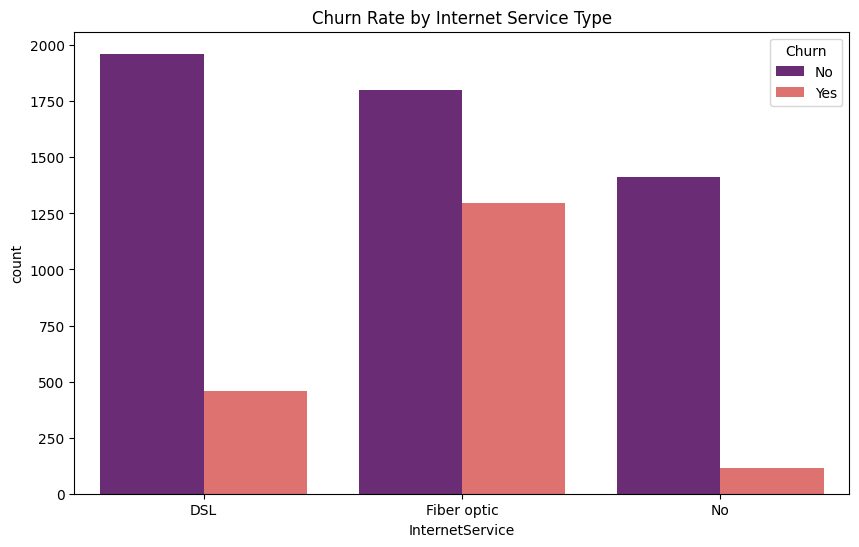

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='InternetService', hue='Churn', data=df_churn, palette= 'magma')
plt.title('Churn Rate by Internet Service Type')
plt.show()

In [22]:
df_churn['Churn']=df_churn['Churn'].apply(lambda x : 1 if x=='Yes' else 0)
X= df_churn[['tenure', 'MonthlyCharges']]
Y= df_churn['Churn']
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 42)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)
print(f"Rentation Model Accuracy: {model.score(X_test, Y_test)*100:.2f}%")

Rentation Model Accuracy: 75.73%


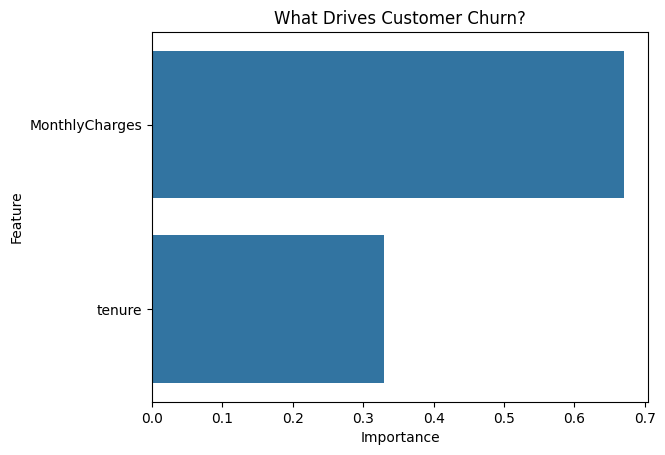

In [23]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

sns.barplot(x='Importance', y='Feature', data=feature_importance_df.sort_values(by='Importance', ascending=False))
plt.title('What Drives Customer Churn?')
plt.show()